In [154]:
# Importing packages: 

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb

import sas7bdat
from sas7bdat import *
from datetime import datetime as dt

In [155]:
!pip install xlrd==1.2.0

In [156]:
# Read SAS data and assign to a dataframe name

xtrtmp = pd.read_sas("xtrfxnd.sas7bdat",format='sas7bdat')

xtrtmp

,Replicate,QID,t_FL_FEA,t_CtPo_EC,t_TtAr,t_CtAr,t_TbAr,t_TtBMD,t_CtBMD,t_CtTh,...,age_at_menop,meno_status,liver_ever,STATUS,r_TTOP,t_TTOP,r_TTHip,t_TTHip,NumberHits,ID
0,1.0,b'CA01519',4901.9,8.8300,960.47070,72.70221,879.26660,160.3830,805.1053,0.757581,...,53.0,2.0,0.0,0.0,23.0,23.0,23.0,23.0,2.0,891.0
1,1.0,b'CA01519',4901.9,8.8300,960.47070,72.70221,879.26660,160.3830,805.1053,0.757581,...,53.0,2.0,0.0,0.0,23.0,23.0,23.0,23.0,2.0,892.0
2,1.0,b'CA01545',6204.0,9.5600,701.02992,99.59033,593.70643,281.8728,799.4792,1.063528,...,32.0,3.0,0.0,0.0,34.0,34.0,34.0,34.0,1.0,893.0
3,1.0,b'CA01590',5529.5,10.2100,689.24115,104.05397,576.36756,253.3904,813.7205,1.142136,...,32.0,3.0,0.0,0.0,34.0,34.0,34.0,34.0,1.0,894.0
4,1.0,b'CA01620',5638.3,6.3200,588.60634,109.83789,473.16833,302.2676,873.6742,1.277396,...,55.0,3.0,0.0,0.0,29.0,29.0,29.0,29.0,3.0,895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,1.0,b'VR02755',5465.0,0.1475,651.50000,92.40000,539.40000,266.3000,690.8000,0.920000,...,63.0,3.0,0.0,2.0,19.0,19.0,19.0,19.0,4.0,1421.0
1227,1.0,b'VR02755',5465.0,0.1475,651.50000,92.40000,539.40000,266.3000,690.8000,0.920000,...,63.0,3.0,0.0,2.0,19.0,19.0,19.0,19.0,4.0,1422.0
1228,1.0,b'VR02755',5465.0,0.1475,651.50000,92.40000,539.40000,266.3000,690.8000,0.920000,...,63.0,3.0,0.0,2.0,19.0,19.0,19.0,19.0,4.0,1423.0
1229,1.0,b'VR02755',5465.0,0.1475,651.50000,92.40000,539.40000,266.3000,690.8000,0.920000,...,63.0,3.0,0.0,2.0,19.0,19.0,19.0,19.0,4.0,1424.0


In [157]:
#convert all columns to lowercase
xtrtmp.columns = xtrtmp.columns.str.lower()
xtrtmp

,replicate,qid,t_fl_fea,t_ctpo_ec,t_ttar,t_ctar,t_tbar,t_ttbmd,t_ctbmd,t_ctth,...,age_at_menop,meno_status,liver_ever,status,r_ttop,t_ttop,r_tthip,t_tthip,numberhits,id
0,1.0,b'CA01519',4901.9,8.8300,960.47070,72.70221,879.26660,160.3830,805.1053,0.757581,...,53.0,2.0,0.0,0.0,23.0,23.0,23.0,23.0,2.0,891.0
1,1.0,b'CA01519',4901.9,8.8300,960.47070,72.70221,879.26660,160.3830,805.1053,0.757581,...,53.0,2.0,0.0,0.0,23.0,23.0,23.0,23.0,2.0,892.0
2,1.0,b'CA01545',6204.0,9.5600,701.02992,99.59033,593.70643,281.8728,799.4792,1.063528,...,32.0,3.0,0.0,0.0,34.0,34.0,34.0,34.0,1.0,893.0
3,1.0,b'CA01590',5529.5,10.2100,689.24115,104.05397,576.36756,253.3904,813.7205,1.142136,...,32.0,3.0,0.0,0.0,34.0,34.0,34.0,34.0,1.0,894.0
4,1.0,b'CA01620',5638.3,6.3200,588.60634,109.83789,473.16833,302.2676,873.6742,1.277396,...,55.0,3.0,0.0,0.0,29.0,29.0,29.0,29.0,3.0,895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,1.0,b'VR02755',5465.0,0.1475,651.50000,92.40000,539.40000,266.3000,690.8000,0.920000,...,63.0,3.0,0.0,2.0,19.0,19.0,19.0,19.0,4.0,1421.0
1227,1.0,b'VR02755',5465.0,0.1475,651.50000,92.40000,539.40000,266.3000,690.8000,0.920000,...,63.0,3.0,0.0,2.0,19.0,19.0,19.0,19.0,4.0,1422.0
1228,1.0,b'VR02755',5465.0,0.1475,651.50000,92.40000,539.40000,266.3000,690.8000,0.920000,...,63.0,3.0,0.0,2.0,19.0,19.0,19.0,19.0,4.0,1423.0
1229,1.0,b'VR02755',5465.0,0.1475,651.50000,92.40000,539.40000,266.3000,690.8000,0.920000,...,63.0,3.0,0.0,2.0,19.0,19.0,19.0,19.0,4.0,1424.0


In [158]:
#vartokeep = ['id', 't_ttbmd', 't_ctbmd', 'r_ttbmd', 'r_ctbmd', 't_moart', 'r_moart', 'hicnum', 'centre', 'age', 'osteomed', 'newosteofx', 'prevfx_any']
#Q1Subset = xtrtmp.loc[:, vartokeep]
#Q1Subset

In [159]:
#freq count for hicnum
xtrtmp['hicnum'].value_counts()

b'CA'    352
b'TO'    292
b'VR'    225
b'HA'    200
b'SK'    161
Name: hicnum, dtype: int64

In [160]:
#freq count for centre
xtrtmp['centre'].value_counts()

centrelist = xtrtmp['centre']


In [161]:
#create new column 'sitename' and code to match centre value
xtrtmp['sitename'] = np.NaN #create empty list 
for i in xtrtmp.index: #loop thru center values and recode accordigly
    if xtrtmp['centre'][i] == 1.0 : xtrtmp['sitename'][i] = 'Calgary'
    elif xtrtmp['centre'][i] == 2.0 : xtrtmp['sitename'][i] = 'Hamilton'
    elif xtrtmp['centre'][i] == 3.0 : xtrtmp['sitename'][i] = 'Saskatoon'
    elif xtrtmp['centre'][i] == 4.0 : xtrtmp['sitename'][i] = 'Toronto - Referent'
    elif xtrtmp['centre'][i] == 5.0 : xtrtmp['sitename'][i] = 'Vancouver'


<ipython-input-161-7cb0ec2d3667>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if xtrtmp['centre'][i] == 1.0 : xtrtmp['sitename'][i] = 'Calgary'
C:\Users\dave_\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-161-7cb0ec2d3667>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif xtrtmp['centre'][i] == 2.0 : xtrtmp[

In [162]:
#verify sitename value counts
xtrtmp['sitename'].value_counts()

Calgary               352
Toronto - Referent    292
Vancouver             225
Hamilton              200
Saskatoon             161
Name: sitename, dtype: int64

In [163]:
#get freq of prevfx_any
xtrtmp['prevfx_any'].value_counts()

0.0    766
1.0    464
Name: prevfx_any, dtype: int64

Text(0, 0.5, 'Site')

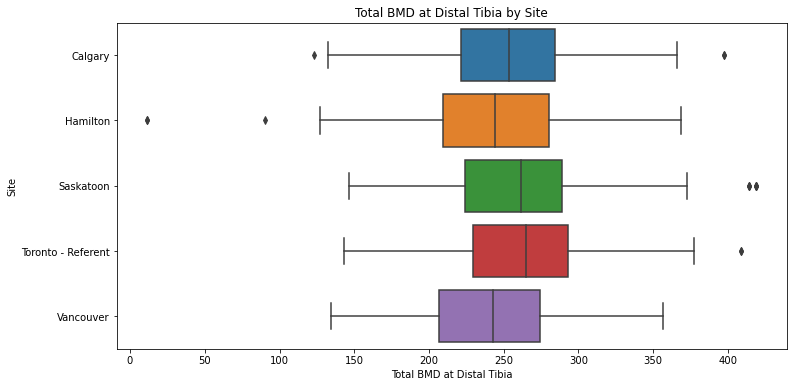

In [164]:
#plot t_ttbmd by site
import seaborn as s 
plt.figure(figsize=(12,6))
s.boxplot(data=xtrtmp, x='t_ttbmd', y='sitename', orient='h') # orient=h is default, could also be v (vertical)
plt.title("Total BMD at Distal Tibia by Site")
plt.xlabel('Total BMD at Distal Tibia')
plt.ylabel('Site')



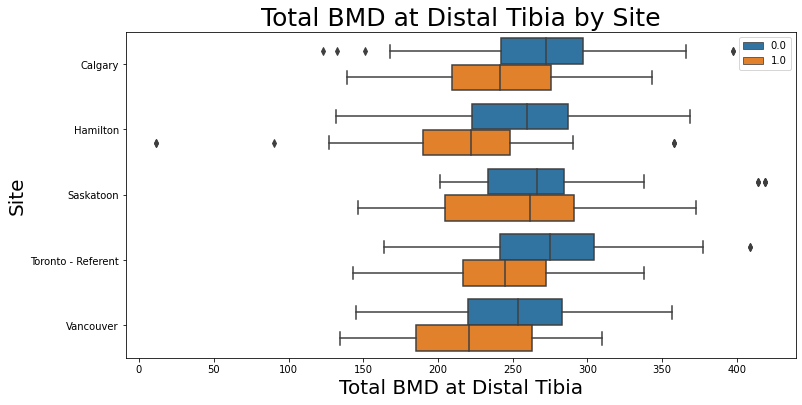

In [165]:
#plot by site and new fracture side by side 
plt.figure(figsize=(12,6))
s.boxplot(data=xtrtmp , x='t_ttbmd', y='sitename', orient='h', hue='prevfx_any',) # orient=h is default, could also be v (vertical)
plt.title("Total BMD at Distal Tibia by Site", fontsize = 25)
plt.xlabel('Total BMD at Distal Tibia', fontsize=20)
plt.ylabel('Site', fontsize = 20)
plt.legend()
plt.show()





In [166]:

#plt.figure(figsize=(12,6))
#s.boxplot(data=xtrtmp[xtrtmp['prevfx_any']==0.0] , x='t_ttbmd', y='sitename', orient='h') # orient=h is default, could also be v (vertical)
#plt.title("t_ttbmd by Site")
#plt.xlabel('t_ttbmd')
#plt.ylabel('Site')
#


In [191]:
pd.crosstab(index=xtrtmp['r_moart'], columns='freq')

col_0,freq
r_moart,
1.0,264
2.0,567
3.0,270
4.0,55
5.0,22


In [192]:
pd.crosstab(index=xtrtmp['t_moart'], columns='freq')

col_0,freq
t_moart,
1.0,847
2.0,271
3.0,60
4.0,5
5.0,3


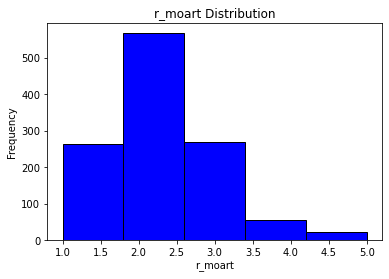

C:\Users\dave_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


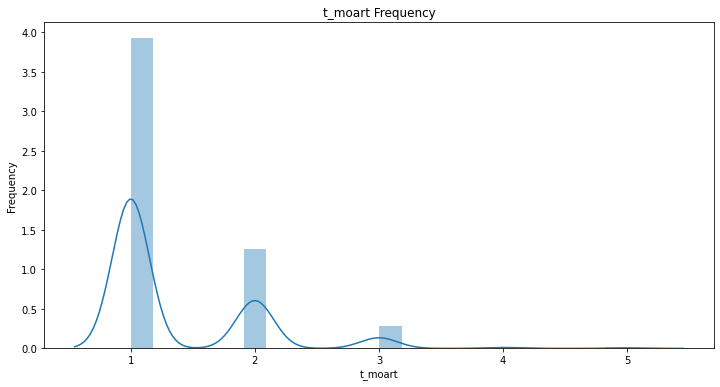

In [190]:
# Q4. b) Determine the distribution (frequencies) of motion grades (moart)
plt.hist(xtrtmp['r_moart'],edgecolor='k',color='blue', bins=5)
plt.title("r_moart Distribution")
plt.xlabel('r_moart')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,6))
s.distplot(xtrtmp['t_moart'], hist=True) 
plt.title('t_moart Frequency')
plt.xlabel('t_moart')
plt.ylabel('Frequency')
plt.show()


Text(0, 0.5, 'Site')

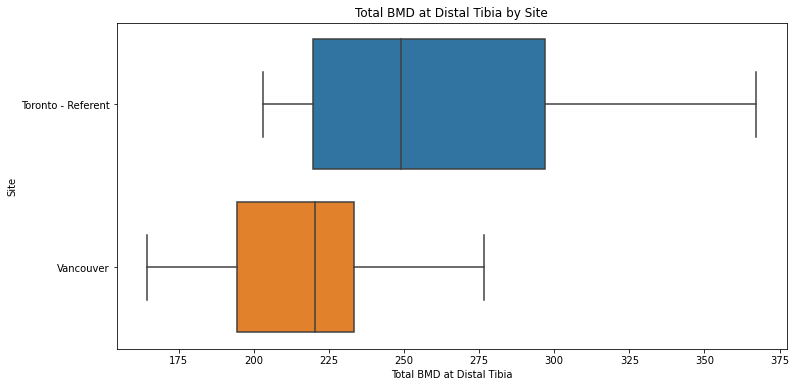

In [168]:
#Q4.c) Repeat the boxplot exercise but look only at motion artifact (t_moart) grades 3 and above, restricting the site to Toronto and Vancouver

import seaborn as s
#create new subset with T / V
boxV= xtrtmp[xtrtmp['sitename'] == 'Vancouver'] #create subset df 1
boxT= xtrtmp[xtrtmp['sitename'] == 'Toronto - Referent'] #create subset df 2
boxTV = pd.concat([boxT, boxV], axis=0) #merge df's
boxTV


plt.figure(figsize=(12,6))
s.boxplot(data=boxTV[boxTV['t_moart'] >=3.0], x='t_ttbmd', y='sitename' , orient='h') 
plt.title("Total BMD at Distal Tibia by Site")
plt.xlabel('Total BMD at Distal Tibia')
plt.ylabel('Site')



Text(0, 0.5, 'Total BMD at Distal Tibia')

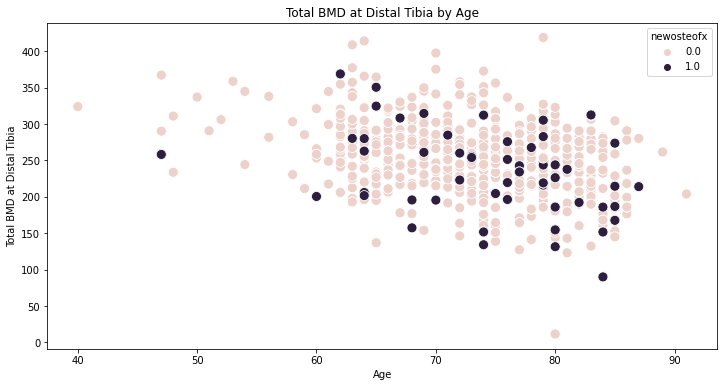

In [169]:
#Q5. Create a scatterplot of how t_ttbmd relates to age

plt.figure(figsize=(12,6))
tbmd_age = s.scatterplot(x= 'age', y = 't_ttbmd', 
            data=xtrtmp, 
            hue='newosteofx', 
            s=100) 

tbmd_age.set_title('Total BMD at Distal Tibia by Age')
plt.xlabel('Age')
plt.ylabel('Total BMD at Distal Tibia')

# Alternatively, set labels with 
# fig.set_axis_labels(x, y)

In [171]:
nandf = xtrtmp[xtrtmp.isna().any(axis=1)]
nandf.head()

,replicate,qid,t_fl_fea,t_ctpo_ec,t_ttar,t_ctar,t_tbar,t_ttbmd,t_ctbmd,t_ctth,...,meno_status,liver_ever,status,r_ttop,t_ttop,r_tthip,t_tthip,numberhits,id,sitename
0,1.0,b'CA01519',4901.9,8.83,960.47070,72.70221,879.26660,160.3830,805.1053,0.757581,...,2.0,0.0,0.0,23.0,23.0,23.0,23.0,2.0,891.0,Calgary
1,1.0,b'CA01519',4901.9,8.83,960.47070,72.70221,879.26660,160.3830,805.1053,0.757581,...,2.0,0.0,0.0,23.0,23.0,23.0,23.0,2.0,892.0,Calgary
2,1.0,b'CA01545',6204.0,9.56,701.02992,99.59033,593.70643,281.8728,799.4792,1.063528,...,3.0,0.0,0.0,34.0,34.0,34.0,34.0,1.0,893.0,Calgary
3,1.0,b'CA01590',5529.5,10.21,689.24115,104.05397,576.36756,253.3904,813.7205,1.142136,...,3.0,0.0,0.0,34.0,34.0,34.0,34.0,1.0,894.0,Calgary
4,1.0,b'CA01620',5638.3,6.32,588.60634,109.83789,473.16833,302.2676,873.6742,1.277396,...,3.0,0.0,0.0,29.0,29.0,29.0,29.0,3.0,895.0,Calgary


In [193]:
# Q6. a) Please create new cross-calibrated values for all sites' 't_ttbmd', 't_ctbmd', 'r_ttbmd', 'r_ctbmd' values according to this table.
#copy df to add new values to
xtrtmp2 = xtrtmp

#add 't_xtbmd_new' to xtrtmp df   't_ttbmd', 't_ctbmd', 'r_ttbmd', 'r_ctbmd 
         # s.boxplot(ax=ax1, data=xtrtmp, x='xvar', y='yvar', hue='categoryvar' ) 

# Method 1 - Vancouver & Calgary
xtrtmp.loc[xtrtmp['sitename'] == 'Vancouver', 't_ttbmd_new'] = 0.99 * xtrtmp['t_ttbmd'] - 3.93
xtrtmp.loc[xtrtmp['sitename'] == 'Vancouver', 't_ctbmd_new'] = 1.04 * xtrtmp['t_ctbmd'] - 0.05

xtrtmp.loc[xtrtmp['sitename'] == 'Calgary', 't_ttbmd_new'] = 0.97 * xtrtmp['t_ttbmd'] + 19.06
xtrtmp.loc[xtrtmp['sitename'] == 'Calgary', 't_ctbmd_new'] = 1.05 * xtrtmp['t_ctbmd'] - 6.82


# Method 2: Saskatoon  
def SaskatoonTTbmd(sitename, t_ttbmd): #funciton to return cross calibrated value t_ttbmd for Saskatoon
    if sitename == "Saskatoon":
        return t_ttbmd * 1.03 - 232.26 
    else:
        return t_ttbmd
    
def SaskatoonCTbmd(sitename, t_ctbmd): #function to return cross calibrated value t_ctbmd for Saskatoon
    if sitename == "Saskatoon":
        return t_ctbmd * 0.99 - 0.03
    else:
        return t_ctbmd  
    
for i in xtrtmp.index: #apply two above functions to generate new values t_ttbmd t_ctbmd
    if xtrtmp['sitename'][i] == "Saskatoon" : xtrtmp['t_ttbmd_new'] = xtrtmp.apply(lambda x: SaskatoonTTbmd(x['sitename'], x['t_ttbmd']), axis=1) 
    if xtrtmp['sitename'][i] == "Saskatoon" : xtrtmp['t_ctbmd_new'] = xtrtmp.apply(lambda x: SaskatoonCTbmd(x['sitename'], x['t_ctbmd']), axis=1)
        

 # xtrtmp['t_ttbmd_new'] = xtrtmp.apply(lambda x: SaskatoonTTbmd(x['sitename'], x['t_ttbmd']), axis=1)
# xtrtmp['t_ctbmd_new'] = xtrtmp.apply(lambda x: SaskatoonCTbmd(x['sitename'], x['t_ctbmd']), axis=1)
       
###### not using this method ####
###Method 3 Calgary
#for i in xtrtmp.index: #t_ttbmd
#    if xtrtmp['sitename'][i] == "Calgary" : xtrtmp['t_ttbmd_new'][i] = 0.97 * xtrtmp['t_ttbmd'][i] + 19.06
#    elif xtrtmp['sitename'][i] == "Calgary" : xtrtmp['t_ctbmd_new'][i] = 1.05 * xtrtmp['t_ctbmd'][i] - 6.82  
##########





In [189]:
xtrtmp.loc[xtrtmp['sitename'] == 'Vancouver', 't_ttbmd_new'] = 0.99 * xtrtmp['t_ttbmd'] - 3.93
xtrtmp.loc[xtrtmp['sitename'] == 'Vancouver'].head()


TypeError: 'method' object is not subscriptable

In [173]:
xtrtmp.columns[xtrtmp.isnull().any()]

Index(['t_fl_fea', 't_ctpo_ec', 't_ttar', 't_ctar', 't_tbar', 't_ttbmd',
       't_ctbmd', 't_ctth', 't_tbbmd', 't_tbn', 't_tbth', 't_tbsp', 't_moart',
       'r_fl_fea', 'r_ctpo_ec', 'r_ttar', 'r_ctar', 'r_tbar', 'r_ttbmd',
       'r_ctbmd', 'r_ctth', 'r_tbbmd', 'r_tbn', 'r_tbth', 'r_tbsp', 'r_moart',
       't_bvtv', 'r_bvtv', 'fnewopfxd', 'fnewhipfxd', 'newosteofx',
       'firstnewosteofx_site', 'firstnewosteofx_year', 'firstnewosteofx_month',
       'firstnewosteofx_day', 'newosteofx_trauma', 'newhipfx',
       'firstnewhipfx_year', 'firstnewhipfx_month', 'firstnewhipfx_day',
       'newhipfx_trauma', 'age', 'height', 'weight', 'centre', 'parenthipfx',
       'prevfx_any', 'cig_cur', 'nbalc_week', 'rheu_ever', 'cortico_oral_reg',
       'nbfall_pastyr', 'everlost10lbs', 'osteomed', 'prev_backmt',
       'prev_hipmt', 'hicnum', 'sex', 'type1diabetes_ever',
       'untreat_hyperthyr_ever', 'age_at_menop', 'meno_status', 'liver_ever',
       'r_ttop', 't_ttop', 'r_tthip', 't_tthip', 

Text(0, 0.5, 'Bone Mineral Density')

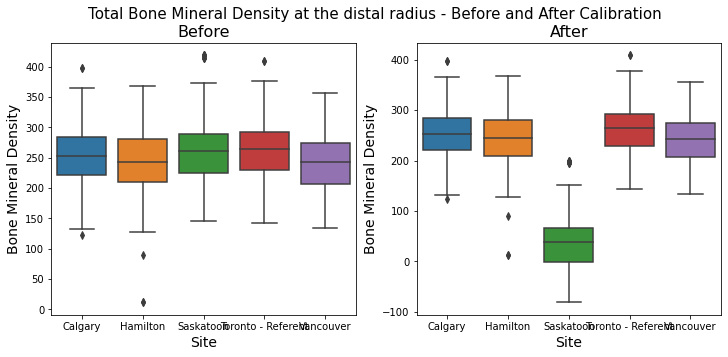

In [196]:
# Q6. b) Create a 1 x 2 subplot containing 2 boxplots: 1 for before and 1 after calibration

fig, axes = plt.subplots(1,2)
fig.set_size_inches(12, 5)
fig.suptitle('Total Bone Mineral Density at the distal radius - Before and After Calibration', fontsize=15)



sb.boxplot(ax=axes[0], data=xtrtmp, x='sitename', y='t_ttbmd') #hue='t_ttbmd_new')
axes[0].set_title('Before', fontsize=16)
axes[0].set_xlabel('Site', fontsize=14)
axes[0].set_ylabel('Bone Mineral Density', fontsize=14)



sb.boxplot(ax=axes[1], data=xtrtmp, x='sitename', y='t_ttbmd_new')
axes[1].set_title('After', size=16)
axes[1].set_xlabel('Site', fontsize=14)
axes[1].set_ylabel('Bone Mineral Density', fontsize=14)

In [175]:
#xtrtmp.loc[xtrtmp['sitename'] == 'Vancouver', 't_ttbmd_new'] = 0.99 * xtrtmp['t_ttbmd'] - 3.93
